In [425]:
import json
import pandas as pd
import numpy as np
from pathlib import Path
import re

In [426]:
data_folder = Path("/Users/tylersojka/Desktop/Bootcamp_Work/Movies-ETL/Data/")

In [427]:
file_to_open = data_folder / "wikipedia-movies.json"

In [428]:
with open(file_to_open, mode='r') as file:
    wiki_movies_raw = json.load(file)


In [429]:
len(wiki_movies_raw)

7311

In [430]:
# first 5 records 
wiki_movies_raw[:5]


[{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
  'year': 1990,
  'imdb_link': 'https://www.imdb.com/title/tt0098987/',
  'title': 'The Adventures of Ford Fairlane',
  'Directed by': 'Renny Harlin',
  'Produced by': ['Steve Perry', 'Joel Silver'],
  'Screenplay by': ['David Arnott', 'James Cappe', 'Daniel Waters'],
  'Story by': ['David Arnott', 'James Cappe'],
  'Based on': ['Characters', 'by Rex Weiner'],
  'Starring': ['Andrew Dice Clay',
   'Wayne Newton',
   'Priscilla Presley',
   'Lauren Holly',
   'Morris Day',
   'Robert Englund',
   "Ed O'Neill"],
  'Narrated by': 'Andrew "Dice" Clay',
  'Music by': ['Cliff Eidelman', 'Yello'],
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Michael Tronick',
  'Productioncompany ': 'Silver Pictures',
  'Distributed by': '20th Century Fox',
  'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
  'Running time': '102 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$20 million',


In [431]:
# last 5 records
wiki_movies_raw[-5:]

[{'url': 'https://en.wikipedia.org/wiki/Holmes_%26_Watson',
  'year': 2018,
  'imdb_link': 'https://www.imdb.com/title/tt1255919/',
  'title': 'Holmes & Watson',
  'Directed by': 'Etan Cohen',
  'Produced by': ['Will Ferrell',
   'Adam McKay',
   'Jimmy Miller',
   'Clayton Townsend'],
  'Screenplay by': 'Etan Cohen',
  'Based on': ['Sherlock Holmes',
   'and',
   'Dr. Watson',
   'by',
   'Sir Arthur Conan Doyle'],
  'Starring': ['Will Ferrell',
   'John C. Reilly',
   'Rebecca Hall',
   'Rob Brydon',
   'Steve Coogan',
   'Ralph Fiennes'],
  'Music by': 'Mark Mothersbaugh',
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Dean Zimmerman',
  'Productioncompanies ': ['Columbia Pictures',
   'Gary Sanchez Productions',
   'Mosaic Media Group',
   'Mimran Schur Pictures'],
  'Distributed by': 'Sony Pictures Releasing',
  'Release date': ['December 25, 2018',
   '(',
   '2018-12-25',
   ')',
   '(United States)'],
  'Running time': '90 minutes',
  'Country': 'United States',
  'Language

In [432]:
# some records in the middle
#wiki_movies_raw[3600:3605]

In [433]:
kaggle_metadata = pd.read_csv(data_folder / "movies_metadata.csv")
ratings = pd.read_csv(data_folder / "ratings.csv")

In [434]:
kaggle_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [435]:
#sample 5 random entries in ratings
ratings.sample(n=5)

,userId,movieId,rating,timestamp
25391705,264368,51540,3.5,1186591309
4963950,51051,168,2.0,961102668
20176347,209768,1199,4.5,1117997291
8909807,91925,531,4.0,1499529033
9288353,95886,1320,1.0,1233193329


In [436]:
#sample 5 random entries in kaggle data
kaggle_metadata.sample(n=5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
25497,False,NaN,2700000,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",http://www.redirectedmovie.com,190469,tt2275946,en,Redirected,Four friends become stranded in Eastern Europe...,...,2014-01-10,0.0,99.0,"[{'iso_639_1': 'pl', 'name': 'Polski'}, {'iso_...",Released,Right crime. Wrong country.,Redirected,False,5.7,162.0
28684,False,NaN,0,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",NaN,297850,tt0099751,en,Heat Wave,A rookie black journalist investigates the ten...,...,1990-08-13,0.0,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Heat Wave,False,0.0,0.0
21872,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...",NaN,27207,tt0101483,en,Bloodsucking Pharaohs in Pittsburgh,Two cops and a detective's daughter go after a...,...,1991-05-02,0.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The cannabalistic crazies with a deadly appeti...,Bloodsucking Pharaohs in Pittsburgh,False,4.3,5.0
32666,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",http://www.forttildenthemovie.com/,253255,tt3457734,en,Fort Tilden,Twenty-something Brooklynites Allie and Harper...,...,2014-03-08,0.0,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Fort Tilden,False,5.1,15.0
35910,False,NaN,0,"[{'id': 37, 'name': 'Western'}]",NaN,133255,tt0031406,nl,Harlem Rides the Range,A cowboy and his sidekick try to help a homest...,...,1939-02-01,0.0,56.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Men Of Action Blaze A Trail Of Love And Lead A...,Harlem Rides the Range,False,0.0,0.0


In [437]:
# see what happens if you iport the wiki data right into a dataframe
wiki_movies_df = pd.DataFrame(wiki_movies_raw)


In [438]:
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990.0,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990.0,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990.0,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990.0,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990.0,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [439]:
# take a look at the columns in a list
wiki_movies_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

In [440]:
# create a list comprehension to filter only movies with directiors and an imdb link
wiki_movies = [movie for movie in wiki_movies_raw
                if('Director' in movie or 'Directed by' in movie)
                    and 'imdb_link' in movie]
len(wiki_movies)

7080

In [441]:
# put the filtered json into a dataframe, and check how many columns
wiki_movies_df = pd.DataFrame(wiki_movies)
len(wiki_movies_df.columns.tolist())

78

In [442]:
# more list comprehension with an additional filter to filter OUT tvshows(anthing with a season)
wiki_movies = [movie for movie in wiki_movies_raw
                if ('Director' in movie or 'Directed by' in movie)
                    and 'imdb_link' in movie
                    and 'No. of episodes' not in movie]
len(wiki_movies)

7076

In [443]:
wiki_movies_df = pd.DataFrame(wiki_movies)
len(wiki_movies_df.columns.tolist())

75

In [444]:
# make a function to make a copy of the movie and return it
def clean_movie(movie):
    movie_copy - dict(movie)
    return movie


In [445]:
wiki_movies_df.sample(n=5)

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
2828,https://en.wikipedia.org/wiki/The_Deep_End_(film),2001,https://www.imdb.com/title/tt0250323/,The Deep End,"[Scott McGehee, David Siegel]",NaN,NaN,NaN,NaN,"[Tilda Swinton, Goran Višnjić, Jonathan Tucker...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2871,https://en.wikipedia.org/wiki/Hedwig_and_the_A...,2001,https://www.imdb.com/title/tt0248845/,Hedwig and the Angry Inch,John Cameron Mitchell,"[Christine Vachon, Katie Roumel, Pamela Koffler]",NaN,NaN,"[Hedwig and the Angry Inch, by, Stephen Trask,...","[John Cameron Mitchell, Andrea Martin, Michael...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6621,https://en.wikipedia.org/wiki/Collide_(film),2017,https://www.imdb.com/title/tt2126235/,Collide,Eran Creevy,"[Joel Silver, Ben Pugh, Rory Aitken, Brian Kav...","[F. Scott Frazier, Eran Creevy]",F. Scott Frazier,NaN,"[Nicholas Hoult, Felicity Jones, Marwan Kenzar...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6584,https://en.wikipedia.org/wiki/Sing_(2016_Ameri...,2016,https://www.imdb.com/title/tt3470600/,Sing,Garth Jennings,"[Chris Meledandri, Janet Healy]",NaN,NaN,NaN,"[Matthew McConaughey, Reese Witherspoon, Seth ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5613,"https://en.wikipedia.org/wiki/Jeff,_Who_Lives_...",2012,https://www.imdb.com/title/tt1588334/,"Jeff, Who Lives at Home","[Jay Duplass, Mark Duplass]","[Lianne Halfon, Russell Smith, Jason Reitman]",NaN,NaN,NaN,"[Jason Segel, Ed Helms, Judy Greer, Susan Sara...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [446]:
wiki_movies_df[wiki_movies_df['Simplified'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
1534,"https://en.wikipedia.org/wiki/East_Palace,_Wes...",1996,https://www.imdb.com/title/tt0119007/,"East Palace, West Palace",Zhang Yuan,"[Christophe Jung, Christophe Ménager, Zhang Yu...",NaN,NaN,NaN,"[Si Han, Hu Jun, Zhao Wei]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6456,https://en.wikipedia.org/wiki/Ip_Man_3,2016,https://www.imdb.com/title/tt2888046/,Ip Man 3,Wilson Yip,Raymond Wong,NaN,NaN,NaN,"[Donnie Yen, Zhang Jin, Lynn Hung, Patrick Tam...",...,NaN,NaN,"[Jip, 6, Man, 6, Saam, 1]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
6613,https://en.wikipedia.org/wiki/The_Great_Wall_(...,2017,https://www.imdb.com/title/tt2034800/,The Great Wall,Zhang Yimou,"[Thomas Tull, Charles Roven, Jon Jashni, Peter...","[Carlo Bernard, Doug Miro, Tony Gilroy]","[Max Brooks, Edward Zwick, Marshall Herskovitz]",NaN,"[Matt Damon, Jing Tian, Pedro Pascal, Willem D...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6661,https://en.wikipedia.org/wiki/Born_in_China,2017,https://www.imdb.com/title/tt4629266/,Born in China,Lu Chuan,"[Roy Conli, Brian Leith, Phil Chapman]","[David Fowler, Brian Leith, Phil Chapman, Lu C...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [447]:
wiki_movies_df[wiki_movies_df['Romanized'].notnull()]['url']

6834    https://en.wikipedia.org/wiki/The_Insult_(film)
6849      https://en.wikipedia.org/wiki/Loveless_(film)
Name: url, dtype: object

In [448]:
sorted(wiki_movies_df.columns.tolist())

['Adaptation by',
 'Also known as',
 'Animation by',
 'Arabic',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cantonese',
 'Chinese',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'French',
 'Genre',
 'Hangul',
 'Hebrew',
 'Hepburn',
 'Japanese',
 'Label',
 'Language',
 'Length',
 'Literally',
 'Mandarin',
 'McCune–Reischauer',
 'Music by',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original release',
 'Original title',
 'Picture format',
 'Polish',
 'Preceded by',
 'Produced by',
 'Producer',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Revised Romanization',
 'Romanized',
 'Running time',
 'Russian',
 'Screen story by',
 'Screenplay by',
 'Simplifie

In [449]:
# complete list of columns that hold alternate title data: Also known as, Arabic, Cantonese, Chinese, French, Hangul, Hebrew, Hepburn, Japanese, Literally,  Mandarin, McCune–Reischauer, Original title, Polish,  Revised Romanization, Romanized, Russian, Simplified, Traditional, Yiddish

In [450]:
def clean_movie(movie):
    movie = dict(movie) #create a non destructive copy   
    alt_titles = {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',  # loop through a list of all alt title keys
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:    ## Check if the current key exists in the movie object.
            alt_titles[key] = movie[key]       # If so, remove the key-value pair and
            movie.pop(key)                      # add to the alternative titles dictionary.
    if len(alt_titles) > 0:                   # After looping through every key, add the
        movie['alt_titles'] = alt_titles        # alternative titles dict to the movie object.
        

    return movie

In [451]:
# make a list of cleaned movies with a list comprehension:
clean_movies = [clean_movie(movie) for movie in wiki_movies]

In [452]:
# Set wiki_movies_df to be the DataFrame created from clean_movies, and print out a list of the columns.
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Adaptation by',
 'Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Length',
 'Music by',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original release',
 'Picture format',
 'Preceded by',
 'Produced by',
 'Producer',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Running time',
 'Screen story by',
 'Screenplay by',
 'Starring',
 'Story by',
 'Suggested by',
 'Theme music composer',
 'Venue',
 'Voices of',
 'Written by',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [453]:
# consolidate all of the like columns

def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    # combine alternate titles into one list
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune-Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles

    # merge column names
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original release', 'Release date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')

    return movie

In [454]:
# make a list of cleaned movies with a list comprehension:
clean_movies = [clean_movie(movie) for movie in wiki_movies]

# Set wiki_movies_df to be the DataFrame created from clean_movies, and print out a list of the columns.
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Created by',
 'Director',
 'Distributor',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'McCune–Reischauer',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Voices of',
 'Writer(s)',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [455]:
wiki_movies_df.sample(n=3)

,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,Created by,Preceded by,Suggested by,alt_titles,Recorded,Venue,Label,Animation by,Color process,McCune–Reischauer
971,https://en.wikipedia.org/wiki/Hated:_GG_Allin_...,1994,https://www.imdb.com/title/tt0107086/,Hated: GG Allin and the Murder Junkies,NaN,"[GG Allin, Merle Allin, Donald ""Dino Sex"" Sach...",NaN,NaN,"[1993, (, 1993, )]",53 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4693,https://en.wikipedia.org/wiki/Last_Chance_Harvey,2008,https://www.imdb.com/title/tt1046947/,Last Chance Harvey,NaN,"[Dustin Hoffman, Emma Thompson, Kathy Baker, J...",NaN,John de Borman,"[December 25, 2008, (, 2008-12-25, )]",92 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3023,https://en.wikipedia.org/wiki/Birthday_Girl,2002,https://www.imdb.com/title/tt0188453/,Birthday Girl,NaN,"[Nicole Kidman, Ben Chaplin]",NaN,Oliver Stapleton,"[6 September 2001, (, 2001-09-06, ), (, Venice...",93 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [456]:
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')
print(len(wiki_movies_df))
wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)
print(len(wiki_movies_df))
wiki_movies_df.head()

7076
7033


,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,Preceded by,Suggested by,alt_titles,Recorded,Venue,Label,Animation by,Color process,McCune–Reischauer,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Russell Boyd,"December 19, 1990",95 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099018


In [457]:
# get how many null values are in each column

[[column,wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]


[['url', 0],
 ['year', 0],
 ['imdb_link', 0],
 ['title', 1],
 ['Based on', 4852],
 ['Starring', 184],
 ['Narrated by', 6752],
 ['Cinematography', 691],
 ['Release date', 32],
 ['Running time', 139],
 ['Country', 236],
 ['Language', 244],
 ['Budget', 2295],
 ['Box office', 1548],
 ['Director', 0],
 ['Distributor', 357],
 ['Editor(s)', 548],
 ['Composer(s)', 518],
 ['Producer(s)', 202],
 ['Production company(s)', 1678],
 ['Writer(s)', 199],
 ['Genre', 6923],
 ['Original language(s)', 6875],
 ['Original network', 6908],
 ['Executive producer(s)', 6936],
 ['Production location(s)', 6986],
 ['Picture format', 6969],
 ['Audio format', 6972],
 ['Voices of', 7031],
 ['Followed by', 7024],
 ['Created by', 7023],
 ['Preceded by', 7023],
 ['Suggested by', 7032],
 ['alt_titles', 7012],
 ['Recorded', 7031],
 ['Venue', 7032],
 ['Label', 7031],
 ['Animation by', 7031],
 ['Color process', 7032],
 ['McCune–Reischauer', 7031],
 ['imdb_id', 0]]

In [458]:
# get the columns that have more than 90% of values (less than 10% nans)
[column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]


['url',
 'year',
 'imdb_link',
 'title',
 'Based on',
 'Starring',
 'Cinematography',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Director',
 'Distributor',
 'Editor(s)',
 'Composer(s)',
 'Producer(s)',
 'Production company(s)',
 'Writer(s)',
 'imdb_id']

In [563]:
# set the colums to keep to a variable
wiki_columns_to_keep = [column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]
# make a df with those columns
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]

In [564]:
# get the types of each column
wiki_movies_df.dtypes

url                              object
year                              int64
imdb_link                        object
title                            object
Based on                         object
Starring                         object
Cinematography                   object
Country                          object
Language                         object
Director                         object
Distributor                      object
Editor(s)                        object
Composer(s)                      object
Producer(s)                      object
Production company(s)            object
Writer(s)                        object
imdb_id                          object
box_office                      float64
budget                          float64
release_date             datetime64[ns]
running_time                    float64
dtype: object

In [460]:
# make a data series that has no nan in box office
box_office = wiki_movies_df['Box office'].dropna()

In [461]:
# get all the values that are not strings (regular expressions only work on strings)
def is_not_a_string(x):
    return type(x) != str
box_office[box_office.map(is_not_a_string)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [462]:
# lambda version of the is_not_a_string function
# lambda arguments: expression
# lambda x: type(x) != str

box_office[box_office.map(lambda x: type(x) != str)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [463]:
# join all the lists into strings using a lambda function
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)


In [464]:
# check to see if there are any non strings left (there arent any)
box_office[box_office.map(lambda x: type(x) != str)]

Series([], Name: Box office, dtype: object)

In [465]:
box_office.sample(n=50)

3574                $216.8 million
4820                   $23,661,038
5994                $100.1 million
2070             $1.7 million (US)
1206    $676,525 (USA) (sub-total)
5339                   $99 million
6900                    $4 million
3493                 $33.1 million
2978                      $515,900
3824                    $3,919,275
138                    $58 million
4629                 $51.5 million
5922                 $32.3 million
4616                  $310 million
2862                 $87.8 million
3274                   $23 million
2646                   $51 million
4772                 $65.5 million
2207              $10,459,961 (US)
4093                 $16.8 million
5753                      $207,853
1964                $302.7 million
4859              US$210.8 million
42                   US$13,236,513
3398                $101.2 million
3538                 $99.3 million
2412                      $145,071
1837                 $10.1 million
6748                

In [466]:
# we need a regular expression to catch all the box office values in the first common form of $123.4 m/b illion
# A dollar sign
# An arbitrary (but non-zero) number of digits
# An optional decimal point
# An arbitrary (but possibly zero) number of more digits
# A space (maybe more than one)
# The word "million" or "billion"

form_one = r'\$\d+\.?\d*\s*[mb]illion'

In [467]:
# count up how many box office values match our first form
box_office.str.contains(form_one, flags=re.IGNORECASE).sum()

3896

In [468]:
# we need a regular expression to catch all the box office values in the second form, $123,456,789
# A dollar sign
# A group of one to three digits
# At least one group starting with a comma and followed by exactly three digits

form_two = r'\$\d{1,3}(?:,\d{3})+'

In [469]:
box_office.str.contains(form_two, flags=re.IGNORECASE).sum()

1544

In [470]:
#create series' to hold the first two forms of box office values

matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE)

In [471]:
# see what other formats there are
box_office[~matches_form_one & ~matches_form_two]

34                         US$ 4,212,828
79                              $335.000
110                   $4.35-4.37 million
130                        US$ 4,803,039
600                           $5000 (US)
731                         $ 11,146,270
957                             $ 50,004
1070                          35,254,617
1147    $ 407,618 (U.S.) (sub-total) [1]
1446                        $ 11,829,959
1480                          £3 million
1611                            $520.000
1865                        ¥1.1 billion
2032                                 N/A
2091                                $309
2130               US$ 171.8 million [9]
2257                   US$ 3,395,581 [1]
2263            $ 1,223,034 ( domestic )
2347                            $282.175
2638            $ 104,883 (US sub-total)
2665         926,423 admissions (France)
2697      $ 1.7 million (US) (sub-total)
2823                            $414.000
2924                            $621.000
3088           $

In [472]:
# adjust the forms to capture more values:
# Some values have spaces in between the dollar sign and the number. -- add \s after \$ in form one
# Some values use a period as a thousands separator, not a comma. -- add \. to the comma seperator section :, => :[,\.]         and also we dont want to capture 1.234 billion so we need a negative lookahead group, add (?!\s[mb]illion) to end
# Some values are given as a range. -- search for string that starts with $ and ends with - replace with just $
box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

# "Million" is sometimes misspelled as "millon." -- make the i in illion optional with ?
form_one = r'\$\s*\d+\.?\d*\s*[mb]ill?i?on'
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]il?li?on)'

In [473]:
# extract just the matching regular expression string values
box_office.str.extract(f'({form_one}|{form_two})')

,0
0,$21.4 million
1,$2.7 million
2,"$57,718,089"
3,"$7,331,647"
4,"$6,939,946"
...,...
7070,$19.4 million
7071,$41.9 million
7072,$76.1 million
7073,$38.4 million


In [474]:
# function to turn the extracted values into a numeric value

def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan

    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*mill?i?on', s, flags=re.IGNORECASE):    ## re.match(pattern, string)

        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','', s)      ## re.sub(pattern, replacement_string, string) to remove dollar signs,                                                              spaces, commas, and letters, if necessary.

        # convert to float and multiply by a million
        value = float(s) * 10**6

        # return value
        return value

    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*bill?i?on', s, flags=re.IGNORECASE):        ## re.match(pattern, string)

        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','', s)       ## re.sub(pattern, replacement_string, string) 

        # convert to float and multiply by a billion
        value = float(s) * 10**9

        # return value
        return value

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]il?li?on)', s, flags=re.IGNORECASE):    ## re.match(pattern, string)

        # remove dollar sign and commas
        s = re.sub('\$|,','', s)         ## re.sub(pattern, replacement_string, string) 

        # convert to float
        value = float(s)

        # return value
        return value

    # otherwise, return NaN
    else:
        return np.nan


In [475]:
# extract values from box_office then apply parse_dollars to first colum in datafrrame returned by str.extract
wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)


In [476]:
wiki_movies_df['box_office']

0       21400000.0
1        2700000.0
2       57718089.0
3        7331647.0
4        6939946.0
           ...    
7071    41900000.0
7072    76100000.0
7073    38400000.0
7074     5500000.0
7075           NaN
Name: box_office, Length: 7033, dtype: float64

In [494]:
wiki_movies_df['box_office'].isnull().sum()

1567

In [493]:
wiki_movies_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title',
 'Based on',
 'Starring',
 'Narrated by',
 'Cinematography',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Director',
 'Distributor',
 'Editor(s)',
 'Composer(s)',
 'Producer(s)',
 'Production company(s)',
 'Writer(s)',
 'Genre',
 'Original language(s)',
 'Original network',
 'Executive producer(s)',
 'Production location(s)',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Created by',
 'Preceded by',
 'Suggested by',
 'alt_titles',
 'Recorded',
 'Venue',
 'Label',
 'Animation by',
 'Color process',
 'McCune–Reischauer',
 'imdb_id',
 'box_office',
 'budget']

In [492]:
# drop the old Box Office column
wiki_movies_df.drop('Box office', axis=1, inplace=True)

KeyError: "['Box office'] not found in axis"

In [480]:
# Create a budget variable:

budget = wiki_movies_df['Budget'].dropna()

In [481]:
# Convert any lists to strings:

budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)

In [482]:
# remove any values between a dollar sign and a hyphen (for budgets given in ranges):
budget = budget.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [488]:
#Use the same pattern matches that you created to parse the box office data, and apply them without modifications to the        budget data. Then, look at what's left
matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE)
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2451                     ₤6,350,000
3144                   € 40 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5424                            N/A
5447                     £4 million
5671                    €14 million
5687                   $ dead link]
6385                  £ 12 million 
6593                     £3 million
6821                  £12.9 

In [489]:
budget = budget.str.replace(r'\[\s*\w+\]\s*', '')

budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2451                     ₤6,350,000
3144                   € 40 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5424                            N/A
5447                     £4 million
5671                    €14 million
5687                   $ dead link]
6385                  £ 12 million 
6593                     £3 million
6821                  £12.9 

In [485]:
wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)


In [491]:
wiki_movies_df['budget']

0       20000000.0
1        6000000.0
2       35000000.0
3       12000000.0
4       25000000.0
           ...    
7071    42000000.0
7072    60000000.0
7073    20000000.0
7074     9000000.0
7075           NaN
Name: budget, Length: 7033, dtype: float64

In [495]:
#drop the old Budget column
wiki_movies_df.drop('Budget', axis=1, inplace=True)

In [496]:
# create a variable to hold the release date values,  converted into strings
release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [498]:
#take a look at the kinds of formats 
release_date.sample(n=25)

636                                       August 26, 1992
743        August 13, 1993 ( 1993-08-13 ) (United States)
6768    October 8, 2017 ( 2017-10-08 ) ( Los Angeles )...
3153                                        2002 ( 2002 )
6353    March 9, 2015 ( 2015-03-09 ) ( New York City )...
3080                     December 20, 2002 ( 2002-12-20 )
3430                    September 19, 2003 ( 2003-09-19 )
3316                                                 2003
6793    March 12, 2017 ( 2017-03-12 ) ( SXSW ) October...
1355                      November 7, 1996 ( 1996-11-07 )
2560                               March 1999 ( 1999-03 )
5253                          July 8, 2011 ( 2011-07-08 )
5411          April 29, 2011 ( 2011-04-29 ) (limited) [1]
3663    February 20, 2004 ( 2004-02-20 ) (United State...
3553    September 3, 2004 ( 2004-09-03 ) (Telluride Fi...
915          January, 1993 April 21, 1995 (United States)
4574    June 12, 2007 ( 2007-06-12 ) ( Sydney ) July 4...
6401    Januar

In [505]:
# The forms we'll be parsing are:

# Full month name, one- to two-digit day, four-digit year (i.e., January 1, 2000)
# Four-digit year, two-digit month, two-digit day, with any separator (i.e., 2000-01-01)
# Full month name, four-digit year (i.e., January 2000)
# Four-digit year

date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]\d,\s\d{4}'
date_form_two = r'\d{4}.[01]\d.[123]\d'
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
date_form_four = r'\d{4}'

In [558]:
# And then we can extract the dates with:

release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags=re.IGNORECASE)

,0
0,"July 11, 1990"
1,"May 17, 1990"
2,"August 10, 1990"
3,"December 25, 1990"
4,"December 19, 1990"
...,...
7071,"December 25, 2018"
7072,"December 11, 2018"
7073,2018
7074,"August 31, 2018"


In [506]:
# set the formats = to new df column 
wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0], infer_datetime_format=True)


In [559]:
# drop old release date column 
wiki_movies_df.drop('Release date', axis=1, inplace=True)

In [515]:
wiki_movies_df['release_date']

0      1990-07-11
1      1990-05-17
2      1990-08-10
3      1990-12-25
4      1990-12-19
          ...    
7071   2018-12-25
7072   2018-12-11
7073   2018-01-01
7074   2018-08-31
7075   2018-12-01
Name: release_date, Length: 7033, dtype: datetime64[ns]

In [516]:
# make a variable that holds the non-null values of Release date in the DataFrame, converting lists to strings:
running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [547]:
# take a look at the kinds of running time formats (most are xxx minutes)
running_time.sample(n=25)

5556     76 minutes
4679     86 minutes
2622     99 minutes
2754     94 minutes
3277     53 minutes
5007     90 minutes
1463     87 minutes
6664    110 minutes
2839     93 minutes
4401     91 minutes
5462    112 minutes
3439     84 minutes
5766     85 minutes
3896     90 minutes
1686    102 minutes
3815     96 minutes
308      96 minutes
3039     89 minutes
1876    122 minutes
5469     92 minutes
3241    108 minutes
2717    115 minutes
2523     85 minutes
2161    108 minutes
4151    109 minutes
Name: Running time, dtype: object

In [522]:
# match the xxx minutes format, ignore cases and return how many match this format
running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE).sum()

6528

In [523]:
# returns the format that doesnt match xxx minutes
running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE) != True]


9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6500       114 minutes [1] 120 minutes (extended edition)
6643                                             104 mins
6709    90 minutes (theatrical) [1] 91 minutes (unrate...
7057    108 minutes (Original cut) 98 minutes (UK cut)...
7075                Variable; 90 minutes for default path
Name: Running time, Length: 366, dtype: object

In [531]:
# adjust the pattern to only search up to m
running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE).sum()

6877

In [545]:
# formats not following xxx m format
running_time[running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE) != True]


668                     UK:84 min (DVD version) US:86 min
727                         78-102 min (depending on cut)
840                       Varies (79 [3] –84 [1] minutes)
1347                                              25 : 03
1443    United States: 77 minutes Argentina: 94 minute...
1499                                            1hr 35min
1551                                               varies
1774                    Netherlands:96 min, Canada:95 min
1777                                       approx. 14 min
2273                                           1 h 43 min
2993                                               1h 48m
3925                                              4 hours
4425    US domestic version: 86 minutes Original versi...
4967    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5424                    115 [1] /123 [2] /128 [3] minutes
5447                                    1 hour 32 minutes
7075                Variable; 90 minutes for default path
Name: Running 

In [548]:
# We can match all of the hour + minute patterns with one regular expression pattern. Our pattern follows:

# Start with one or more digits.
# Have an optional space after the digit and before the letter "h."
# Capture all the possible abbreviations of "hour(s)." To do this, we'll make every letter in "hours" optional except the "h."
# Have an optional space after the "hours" marker.
# Have an optional number of digits for minutes.
# As a pattern, this looks like "\d+\s*ho?u?r?s?\s*\d*".

running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')


In [549]:
#  Because we may have captured empty strings, we'll use the to_numeric() method and set the errors argument to 'coerce'. Coercing the errors will turn the empty strings into Not a Number (NaN), then we can use fillna() to change all the NaNs to zeros.

running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)

In [550]:
# Now we can apply a function that will convert the hour capture groups and minute capture groups to minutes if the pure minutes capture group is zero, and save the output to wiki_movies_df

wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)

In [551]:
# drop Running time from the dataset with the following code:

wiki_movies_df.drop('Running time', axis=1, inplace=True)

In [555]:
#take a look at running time column of df. (minutes)
wiki_movies_df['running_time']

0       102.0
1       114.0
2       113.0
3       106.0
4        95.0
        ...  
7071     90.0
7072    132.0
7073    120.0
7074    123.0
7075     90.0
Name: running_time, Length: 7033, dtype: float64

In [571]:
wiki_movies_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title',
 'Based on',
 'Starring',
 'Cinematography',
 'Country',
 'Language',
 'Director',
 'Distributor',
 'Editor(s)',
 'Composer(s)',
 'Producer(s)',
 'Production company(s)',
 'Writer(s)',
 'imdb_id',
 'box_office',
 'budget',
 'release_date',
 'running_time']

In [561]:
## KAGGLE META DATA CLEANING

In [569]:
# take a look at the data
kaggle_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [572]:
# get how many of each value are in the adult column
kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 - Written by Ørnås                                                                                                                   1
Name: adult, dtype: int64

In [573]:
# get the movies that arent true or false  for adult 
kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [574]:
# keep all records where adult = false, then drop the column
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult',axis='columns')

In [575]:
# Next, we'll look at the values of the video column:
kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [576]:
# convert to bool
kaggle_metadata['video'] == 'True'

0        False
1        False
2        False
3        False
4        False
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Name: video, Length: 45454, dtype: bool

In [577]:
#assign bool column to video
kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'

In [578]:
# convert all the columns that should be numeric 
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [579]:
# convert release to date time
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])


In [580]:
## REASONABILITY CHECKS ON RATINGS DATA

In [581]:
ratings.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [582]:
# convert timestamp to datetime
pd.to_datetime(ratings['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [583]:
# assign it to the timestamp column
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')


count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

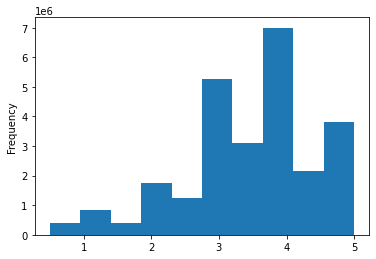

In [584]:
pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()